## Iris Flowers Classification ML Project

Name: Shebin Benny
    
Data Science Intern

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [3]:
df=pd.read_csv("Iris.csv")

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.shape

(150, 6)

In [7]:
#statistical description of the dataset
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64

In [9]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [10]:
#Splitting dataset into training and testing
train, test = train_test_split(df, test_size = 0.25)
print(train.shape)
print(test.shape)

(112, 6)
(38, 6)


In [12]:
x_train = train[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
y_train = train.Species

x_test = test[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm',
                 'PetalWidthCm']]
y_test = test.Species

In [13]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
100,6.3,3.3,6.0,2.5
19,5.1,3.8,1.5,0.3
12,4.8,3.0,1.4,0.1
129,7.2,3.0,5.8,1.6
72,6.3,2.5,4.9,1.5


In [14]:
y_test.head()

128     Iris-virginica
102     Iris-virginica
50     Iris-versicolor
39         Iris-setosa
9          Iris-setosa
Name: Species, dtype: object

Logistic regression as a model

In [16]:
model = LogisticRegression()
model.fit(x_train, y_train)
prediction = model.predict(x_test)
print('Accuracy:',metrics.accuracy_score(prediction,y_test))

Accuracy: 1.0


In [17]:
confusion_mat = confusion_matrix(y_test,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(y_test,prediction))

Confusion matrix: 
 [[13  0  0]
 [ 0 10  0]
 [ 0  0 15]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        10
 Iris-virginica       1.00      1.00      1.00        15

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38



Support Vector as a model

In [18]:
model1 = SVC()
model1.fit(x_train,y_train)
y_pred = model1.predict(x_test)
print("Acc=",accuracy_score(y_test,y_pred))

Acc= 0.9736842105263158


KNN as a model

In [19]:
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred2))

Accuracy Score: 1.0


Decision Tree as a model

In [20]:
model3 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model3.fit(x_train,y_train)
y_pred3 = model3.predict(x_test)
print("Accuracy Score:",accuracy_score(y_test,y_pred3))

Accuracy Score: 1.0


Data Visualization

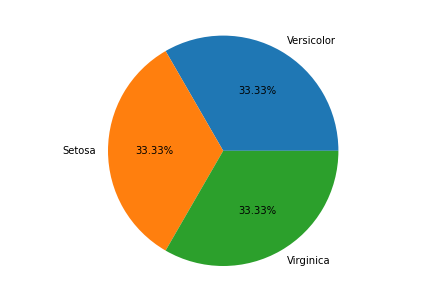

In [21]:
#pie chart
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

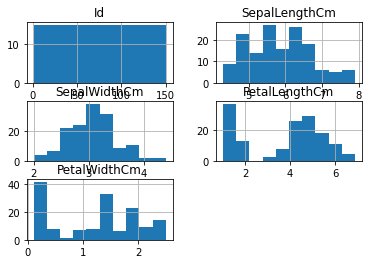

In [23]:
#Histogram
df.hist()
plt.show()

In [25]:
#Scatter Plot
X = df['SepalLengthCm'].values.reshape(-1,1)
Y = df['SepalWidthCm'].values.reshape(-1,1)

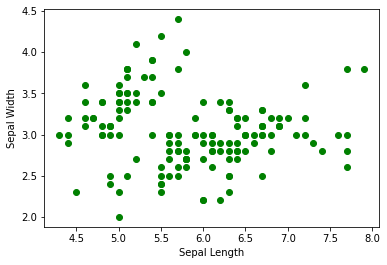

In [26]:
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.scatter(X,Y,color='g')
plt.show()